In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy

In [2]:
# Fetch the quasar data
data = np.load("dr7_quasar.npy")

# select the first 10000 points
data = data[:10000]

z = data["redshift"]

Text(0.5, 0, 'z')

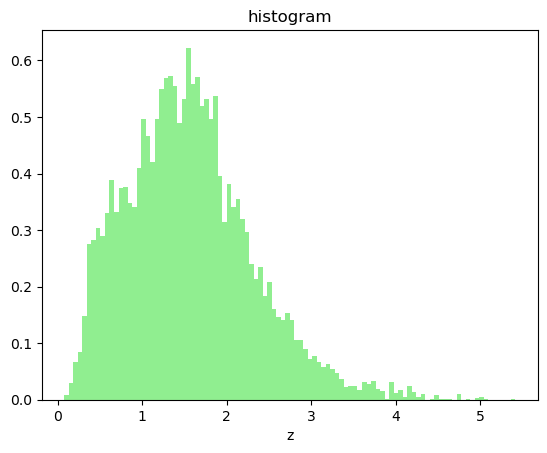

In [9]:
plt.hist(z, bins=100, density=True, color="lightgreen")
plt.title("histogram")
plt.xlabel("z")

Text(0.5, 0, 'z')

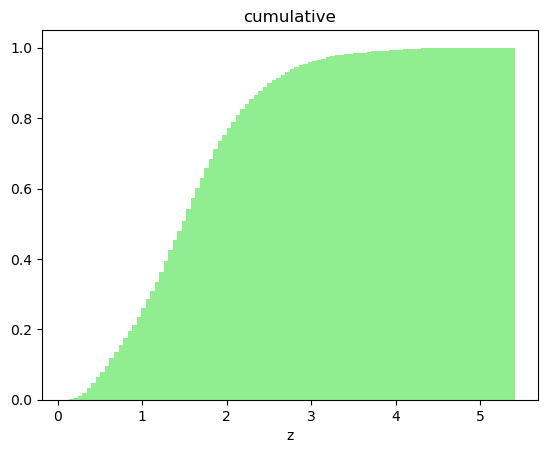

In [10]:
bars, binss, n = plt.hist(z, bins=100, density=True, cumulative=True, color="lightgreen")
plt.title("cumulative")
plt.xlabel("z")

Text(0, 0.5, 'z')

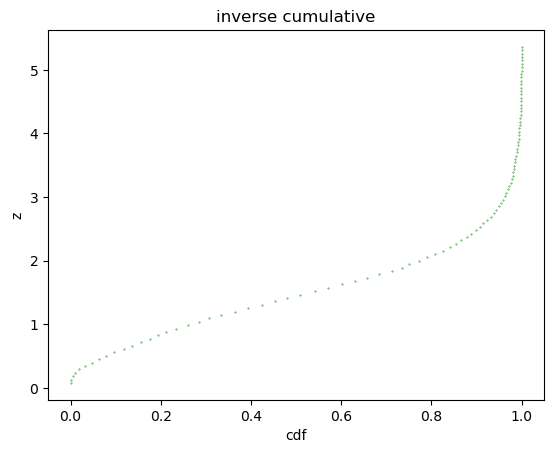

In [12]:
bins = np.delete(binss, len(binss)-1)
plt.scatter(bars, bins, s=0.1, color="green")
plt.title("inverse cumulative")
plt.xlabel("cdf")
plt.ylabel("z")

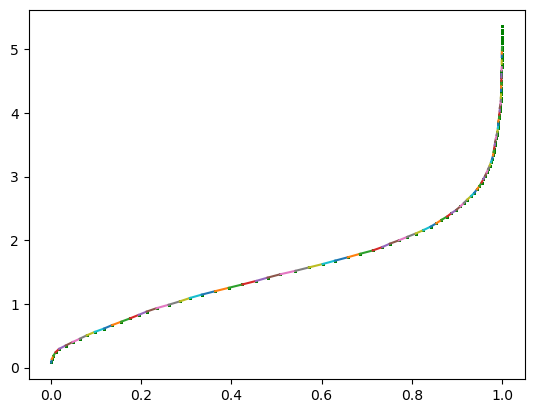

In [13]:
def r(x,m,q):
  return (m*x)+q
pars = np.zeros((len(bins)-2, 2))
for i in range(len(bars)-2):
    pars[i], cov1 = curve_fit(r, bars[i:i+2], bins[i:i+2], p0=[0, 10])
    f1 = r(bars[i:i+2], pars[i,0], pars[i,1])
    plt.scatter(bars, bins, s=0.1, color="green")
    plt.plot(bars[i:i+2], f1)

Text(0.5, 0, 'z')

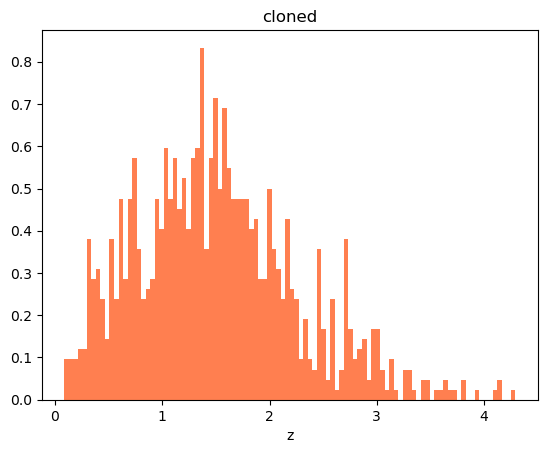

In [14]:
cdfrand = np.random.uniform(0, 1, 1000)
zrand = np.zeros(len(cdfrand))
for j in range(len(cdfrand)):
    for i in range(len(bars)):
        if bars[i]<cdfrand[j]<bars[i+1]:
            zrand[j] = r(cdfrand[j], pars[i,0], pars[i,1])
plt.hist(zrand, bins=100, density=True, color="coral")
plt.title("cloned")
plt.xlabel("z")

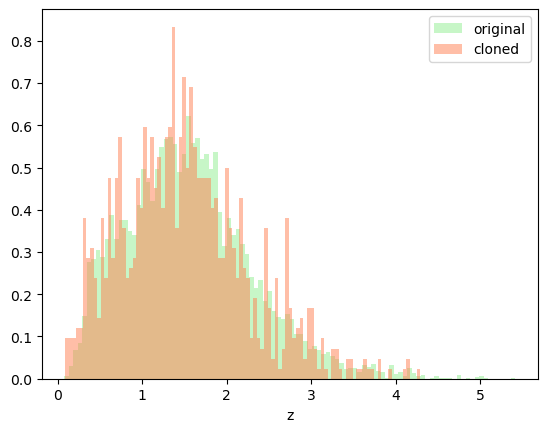

In [15]:
plt.hist(z, bins=100, density=True, label="original", alpha=0.5, color="lightgreen")
plt.hist(zrand, bins=100, density=True, label="cloned", alpha=0.5, color="coral")
plt.xlabel("z")
plt.legend()

In [19]:
z_vals = np.linspace(0,5,100)
comvol = astropy.cosmology.Planck18.differential_comoving_volume(z_vals).value
plt.plot(zvals, comvol/6.5e10)

AttributeError: module 'astropy' has no attribute 'cosmology'